In [58]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import random
from sklearn.model_selection import cross_validate,cross_val_score,LeaveOneOut
from sklearn.metrics import recall_score

In [59]:
# Load the HR data from the CSV file
hr_data = pd.read_csv('HR_data_transformed.csv', sep=',', header=0)
hr_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset to understand its structure
hr_data.head()

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,77.965186,78.00,3.345290,73.23,83.37,22924.945,3,3,1,1,1,1
1,70.981097,70.57,2.517879,67.12,78.22,21930.400,3,2,1,1,5,1
2,73.371959,73.36,3.259569,67.88,80.22,21647.085,3,1,1,1,0,1
3,78.916822,77.88,4.054595,72.32,84.92,25258.905,2,3,1,1,1,1
4,77.322226,74.55,6.047603,70.52,90.15,23890.565,2,2,1,1,5,1


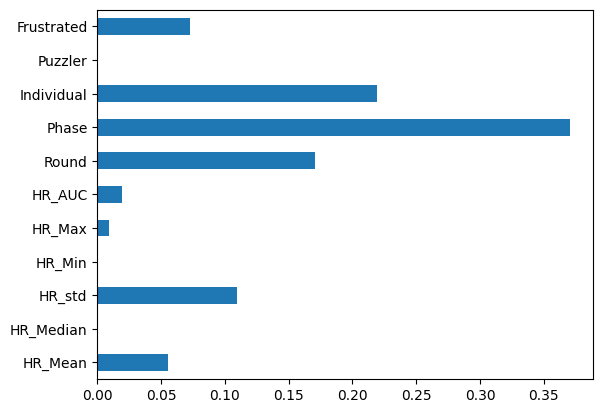

In [60]:
# We will first try to check what categorial variables has the biggest mutual information
# ONLY look at the categorial variables, as the numerical variables does NOT give accurate information of the information gain

target_column = 'Frustrated'
importances = mutual_info_classif(hr_data.drop(target_column, axis=1), hr_data[target_column])
feat_importances = pd.Series(importances, index=hr_data.columns[:-1])

feat_importances.plot(kind="barh")
plt.show()
# Mutual information is a measure of the dependence between two variables, it quantifies the amount of information that knowing the value of a feature provides about the target variable.

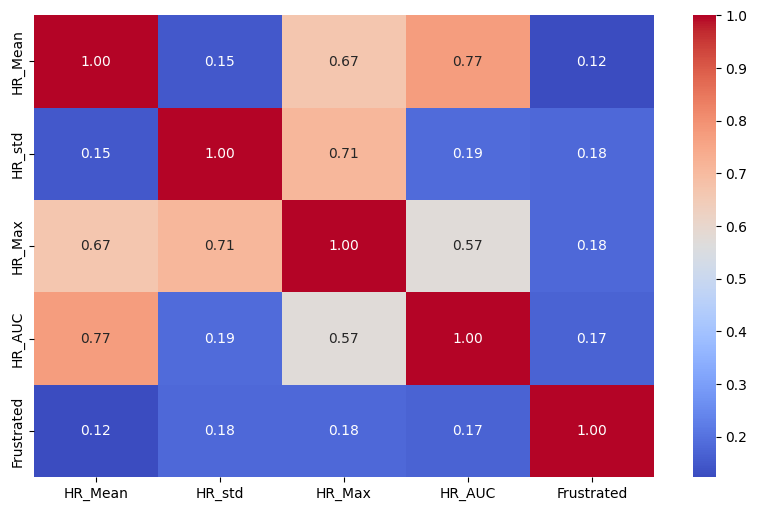

In [66]:
# Now we will try checking the correlation of the features by viewing their correlation coefficients // Spearman Correlation
filtered_hr_data = hr_data.copy()
dropped = ["HR_Median","HR_Min","Round", "Phase", "Individual", "Puzzler", "Cohort"]

for column_to_drop in dropped:
    filtered_hr_data.drop(column_to_drop, axis=1, inplace=True)
# Assuming hr_data is your DataFrame
cor, p_values = spearmanr(filtered_hr_data)

plt.figure(figsize=(10, 6))
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=filtered_hr_data.columns, yticklabels=filtered_hr_data.columns)
plt.show()
# if two features are correlated, the model only needs one, as the second does not add additional information  correlation_heatmap.PNG

In [62]:
# Therefore we can drop HR_Median, as it is too heavily correlated with HR_Mean
# vi kan også overveje at fjerne std fordi den har en stærk negativ correlation med resten af vores features, og fordi at den har en stærk correlation med HR_max, hvilket betyder at de nok giver samme info
# Husk at hvis correlation er over 0.05, er der faktisk correlation mellem dem, så dem skal man nok beholde
# (skiftet til dansk pga why not lol)

# Lad os prøve at lave correlation matrix igen uden de features!

In [63]:
# Vi filtrerer dataen, så de variables i "dropped" ikke er med - og da vi faktisk kun skal bruge HR variablerne, dropper vi alle de andre.
filtered_hr_data = hr_data.copy()
dropped = ["HR_Median", "Round", "Phase", "Individual", "Puzzler", "Cohort"]

for column_to_drop in dropped:
    filtered_hr_data.drop(column_to_drop, axis=1, inplace=True)

filtered_hr_data.head()


,HR_Mean,HR_std,HR_Min,HR_Max,HR_AUC,Frustrated
0,77.965186,3.345290,73.23,83.37,22924.945,1
1,70.981097,2.517879,67.12,78.22,21930.400,5
2,73.371959,3.259569,67.88,80.22,21647.085,0
3,78.916822,4.054595,72.32,84.92,25258.905,1
4,77.322226,6.047603,70.52,90.15,23890.565,5


<AxesSubplot: >

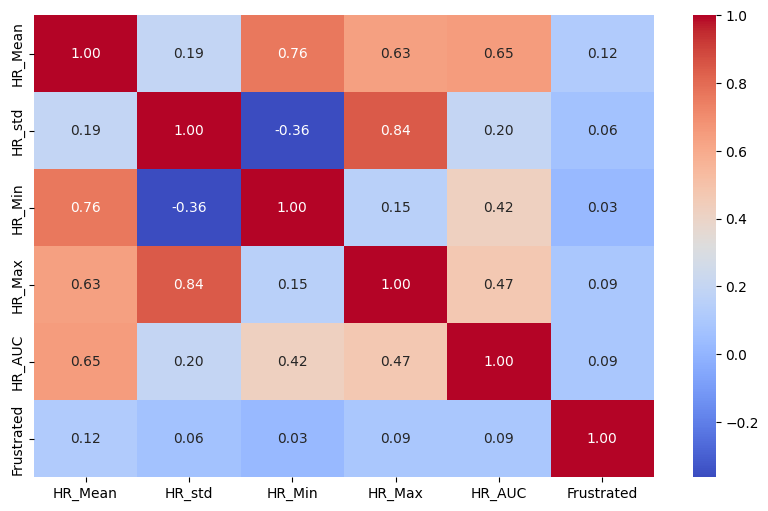

In [64]:
cor = filtered_hr_data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor,annot=True,cmap='coolwarm', fmt=".2f")

In [65]:
# En idé er også at lave Forward/Backward feature selection/elimination, men nu begynder jeg på basline, for at få tjek på den lidt